# Measurement Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cmaps
import math

In [3]:
df = pd.read_csv("perf_test_cuda_257136.csv")
df.head()

,Size,NUM_STREAMS,Time
0,8,1,0.000038
1,8,2,0.000042
2,8,4,0.000053
3,8,8,0.000072
4,32,1,0.000038


In [4]:
sub_df1 = df[df['Size'] == 8]
sub_df2 = df[df['Size'] == 512]
print(sub_df2)

    Size  NUM_STREAMS      Time
18   512            1  0.000038
19   512            2  0.000042
20   512            4  0.000051
21   512            8  0.000073
22   512           16  0.000116
23   512           32  0.000193
24   512           64  0.000355
25   512          128  0.000691
26   512          256  0.001341
27   512          512  0.002613


## time vs number of streams

[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]


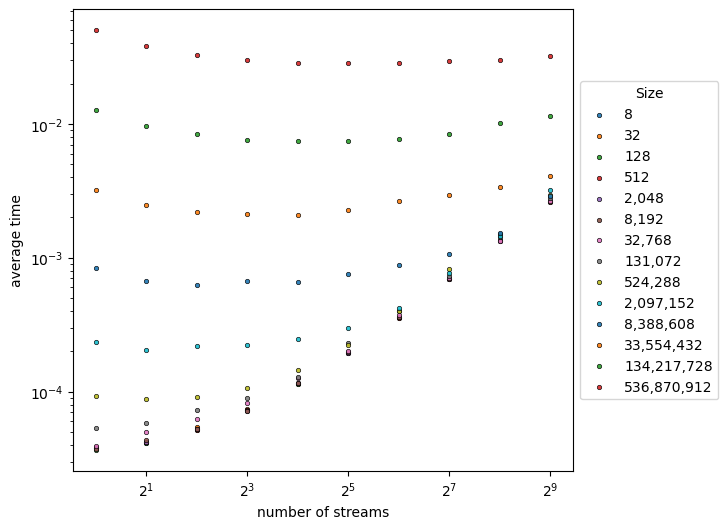

results for size =  134217728
1  streams, chunksize =  134217728.0
----- improvement ------ 0.0  % 
2  streams, chunksize =  67108864.0
----- improvement ------ 23.706844049323358  % 
4  streams, chunksize =  33554432.0
----- improvement ------ 33.34427474274506  % 
8  streams, chunksize =  16777216.0
----- improvement ------ 39.595273311134136  % 
16  streams, chunksize =  8388608.0
----- improvement ------ 41.28995262237901  % 
32  streams, chunksize =  4194304.0
----- improvement ------ 40.89883019196242  % 
64  streams, chunksize =  2097152.0
----- improvement ------ 39.18627551787141  % 
128  streams, chunksize =  1048576.0
----- improvement ------ 33.80025468437329  % 
256  streams, chunksize =  524288.0
----- improvement ------ 19.849562211799327  % 
512  streams, chunksize =  262144.0
----- improvement ------ 10.014157920130353  % 
results for size =  8388608
1  streams, chunksize =  8388608.0
----- improvement ------ 0.0  % 
2  streams, chunksize =  4194304.0
----- improvement

In [50]:
sizes = df['Size'].unique()
print(sizes)
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    sub_df = df[df['Size'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

size = 134217728
print("results for size = ", size)

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = 100 * (times[0] - times[idx]) / times[0]
    print(numstreams[idx], " streams, chunksize = ", size / numstreams[idx])
    print("----- improvement ------", improvement, " % ")

size = 8388608
print("results for size = ", size)

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = 100 * (times[0] - times[idx]) / times[0]
    print(numstreams[idx], " streams, chunksize = ", size / numstreams[idx])
    print("----- improvement ------", improvement, " % ")
    


size = 536870912
print("results for size = ", size)

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = 100 * (times[0] - times[idx]) / times[0]
    print(numstreams[idx], " streams, chunksize = ", size / numstreams[idx])
    print("----- improvement ------", improvement, " % ")
    



for size <= 131072 (2^19) no runtime improvement by using streams

In [52]:
math.log2(8388608)
2**23
math.log2(2097152)
2**21
math.log2(16777216)
2**24

16777216

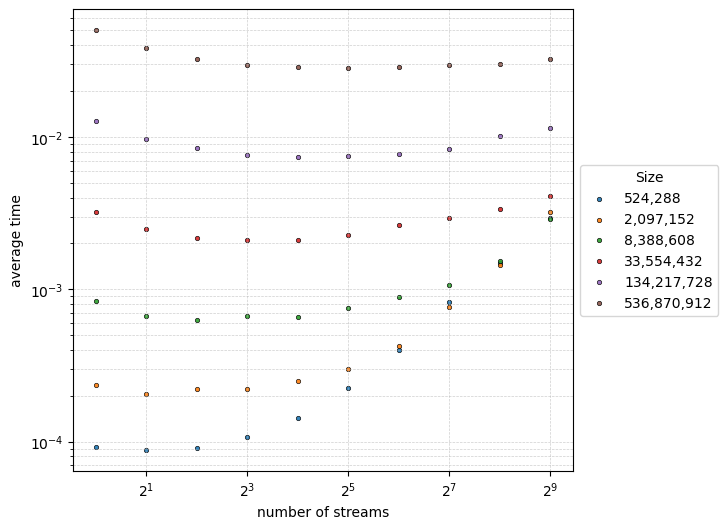

In [7]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    if size > 131072:
        sub_df = df[df['Size'] == size]
        #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
        plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.savefig('cuda_scaling.pdf', bbox_inches='tight')
plt.show()

for 524288/2^19 and  only 2 streams are beneficial


In [8]:
math.log2(524288)
math.log2(536870912)

29.0

## time vs array size

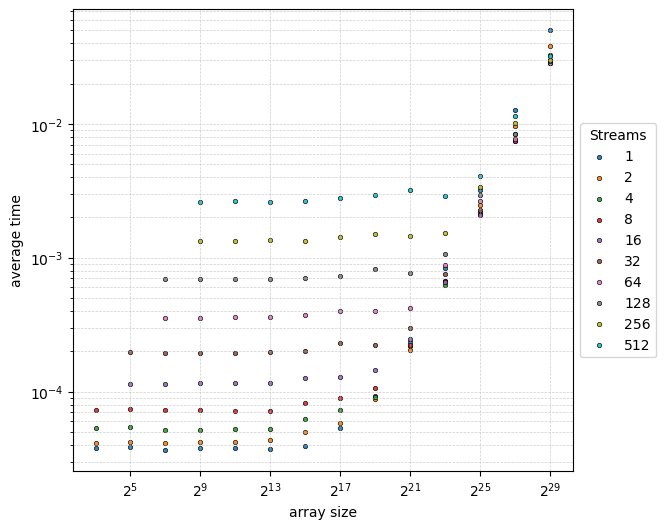

In [9]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['Size'], sub_df['Time'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

using streams is only beneficial for big array sizes

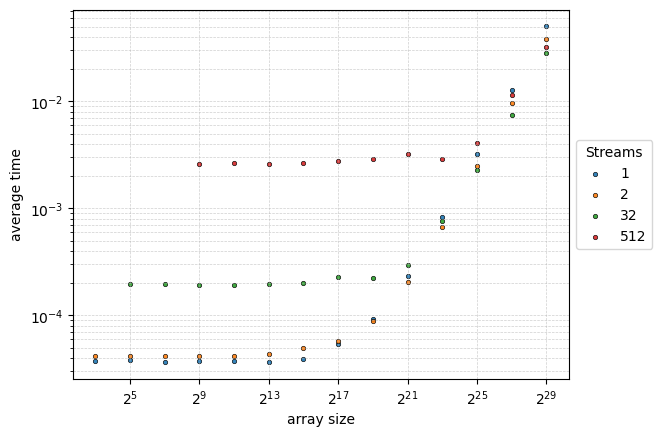

In [10]:
sub_df = df[df['NUM_STREAMS'] == 1]
#plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
plt.scatter(sub_df['Size'], sub_df['Time'],
            label=f'{1:,}',  # Adds thousands separators
            s=10,  # Larger dots
            alpha=0.9,  # Slight transparency
            edgecolor='black', linewidth=0.5)

sub_df = df[df['NUM_STREAMS'] == 2]
#plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
plt.scatter(sub_df['Size'], sub_df['Time'],
            label=f'{2:,}',  # Adds thousands separators
            s=10,  # Larger dots
            alpha=0.9,  # Slight transparency
            edgecolor='black', linewidth=0.5)

sub_df = df[df['NUM_STREAMS'] == 32]
#plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
plt.scatter(sub_df['Size'], sub_df['Time'],
            label=f'{32:,}',  # Adds thousands separators
            s=10,  # Larger dots
            alpha=0.9,  # Slight transparency
            edgecolor='black', linewidth=0.5)


sub_df = df[df['NUM_STREAMS'] == 512]
#plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
plt.scatter(sub_df['Size'], sub_df['Time'],
            label=f'{512:,}',  # Adds thousands separators
            s=10,  # Larger dots
            alpha=0.9,  # Slight transparency
            edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')


## time per value vs array size

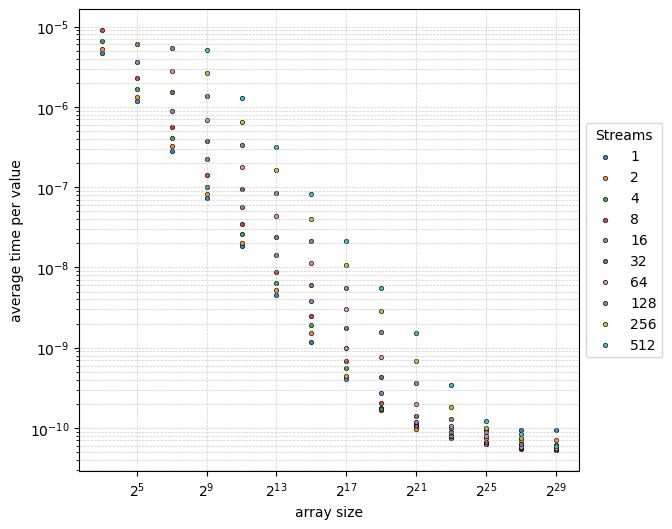

In [11]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
#plt.yscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

Text(0, 0.5, 'average time per value')

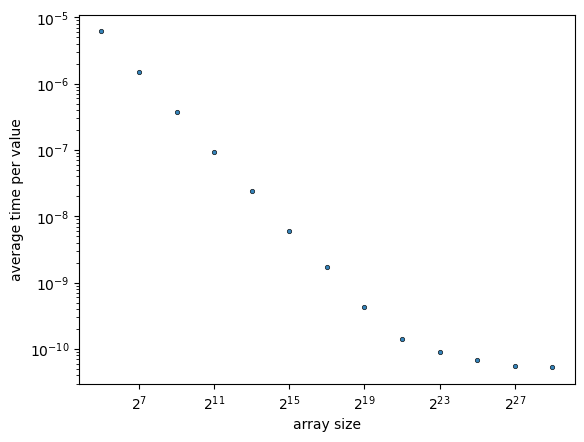

In [12]:
sub_df = df[df['NUM_STREAMS'] == 32]
plt.scatter(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')



# Multiple arccos calls

In [13]:
df_multi = pd.read_csv("perf_test_cuda_258389.csv")
df_multi.head()

,Calls,Size,NUM_STREAMS,Time
0,1,8,1,0.000030
1,1,8,2,0.000031
2,1,8,4,0.000044
3,1,8,8,0.000057
4,1,32,1,0.000027


In [24]:
numcalls = df_multi["Calls"].unique()
print(numcalls)

sizes = df_multi["Size"].unique()
print(sizes)

numstreams = df_multi["NUM_STREAMS"].unique()
print(numstreams)


[  1   2   4   8  16  32  64 128 256 512]
[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]
[  1   2   4   8  16  32  64 128 256 512]


4096.0

In [15]:
sub_df_multi = df_multi[(df_multi['Size'] == 134217728) & (df_multi['Calls'] == 64)]
sub_df_multi.head()

,Calls,Size,NUM_STREAMS,Time
706,64,134217728,1,0.011411
707,64,134217728,2,0.009249
708,64,134217728,4,0.008160
709,64,134217728,8,0.007612
710,64,134217728,16,0.007346


Text(0, 0.5, 'average time')

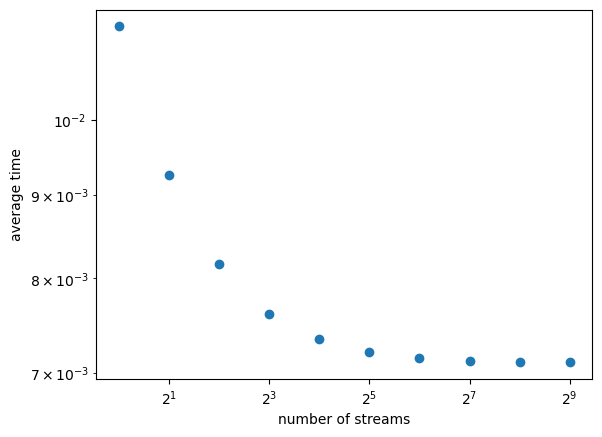

In [16]:
plt.scatter(sub_df_multi["NUM_STREAMS"], sub_df_multi["Time"])
plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('average time')

,Calls,Size,NUM_STREAMS,Time
364,4,134217728,1,0.005150
365,4,134217728,2,0.004246
366,4,134217728,4,0.003848
367,4,134217728,8,0.003661
368,4,134217728,16,0.003593


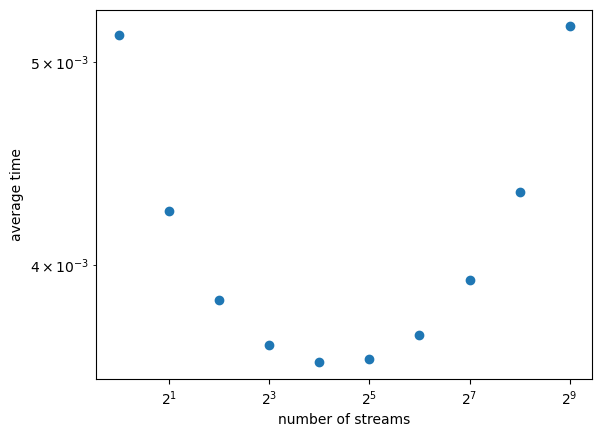

In [17]:
sub_df_multi = df_multi[(df_multi['Size'] == 134217728) & (df_multi['Calls'] == 4)]
plt.scatter(sub_df_multi["NUM_STREAMS"], sub_df_multi["Time"])
plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('average time')

sub_df_multi.head()

[  1   2   4   8  16  32  64 128 256 512]


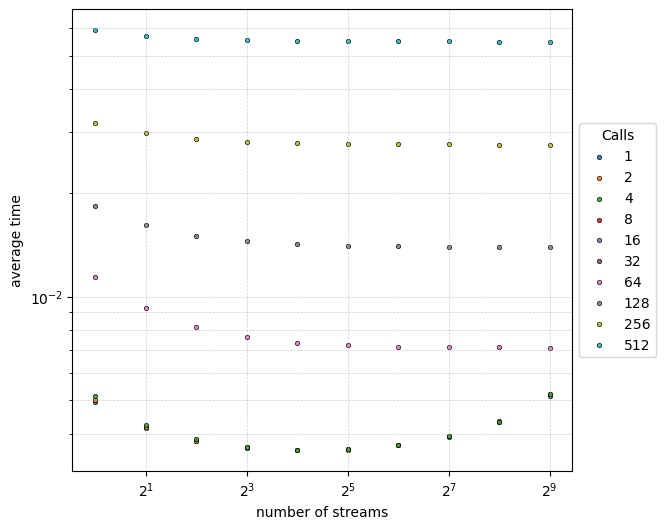

In [20]:
plt.figure(figsize=(8, 6))
print(numcalls)

size = 134217728

for idx, call in enumerate(numcalls):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Calls'] == call) ]
        plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
                label=f'{call:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Calls')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.savefig('cuda_scaling.pdf', bbox_inches='tight')
plt.show()

-> Fallbeispiel, Anzahl Flops unklar
-> sollte array size durch numstreams teilbar sein? -> Ja und haben wir auch sichergestellt durch Verwenden von 2er Potenzen

In [23]:
6*2**22 / 8


3145728.0